# Unit 6 Lecture 1 - Data Visualization

CAI 4823: Artificial Intelligence for Industrial Engineers<br>
University of Central Florida


## Notebook Learning Objectives
After studying this notebook students should be able to:
- Visualize Series and DataFrames using ```.plot()```, ```.plot.bar()```, ```plot.barh()```, ```plt.subplot()```, and ```plt.style.use()```.
- Create various types of plots including:

    - histograms, 
    - density, 
    - contour, 
    - scatter, and 
    - facets
- Visualize errors including error bars and confidence intervals.
- Use external data files: "educ_figdp_1_Data.csv", "macrodata.csv", and "tips.csv."

# Overview

There are a plethora of options for creating graphics in Python, some of the tools used commonly are Matplotlib, Seaborn, Bokeh, Plotly, Ggplot, Vispy, and Veg.

With these tools, it is possible to specify dynamic, interactive graphics in Python that are destined for a web browser. For creating static graphics for print or web, it is recommended to use matplotlib and add-on libraries like seaborn as required. For all other visualization purposes, it may be useful to learn one or more of the above mentioned tools. It is helpful to explore the visualization ecosystem as it continues to evolve and innovate.

In this Notebook, we will learn different types of plots, plotting methods and basic visualization for Panda's Series and DataFrames using: 
- Matplotlib
- Seaborn 

We can assemble a plot from its base components: the data display (i.e., the type of plot : line, bar, scatter, contour, etc...), legend, title, tick labels, other annotations. In pandas we have multiple columns of data, along with row and column labels. Pandas itself has built-in methods that simplify creating visualizations from Data-Frame and Series objects. 

# Giving Python "Plotting" powers

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Series using <code>.plot()</code>

Series and DataFrame each have a plot attribute for creating basic plots. By default, <code>.plot()</code> makes line plots, for example, lets create a simple <code>Series</code> consisting of 10 random values:

In [69]:
series1 = pd.Series(np.random.randn(10), index = np.arange(0,10,1)) # creating a sample series
series1

0   -0.079148
1   -0.003570
2   -1.267629
3   -0.064911
4   -0.302730
5   -0.217581
6    1.690449
7    0.261793
8    0.356177
9    0.770249
dtype: float64

To plot <code>series1</code> we just use <code>.plot()</code> as follows:

<AxesSubplot:>

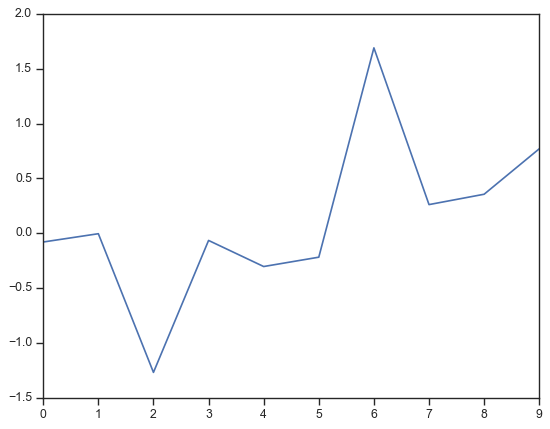

In [70]:
series1.plot()
#plt.show() # no needed for interactive mode

To plot two datasets into the same figure, simply put the two plots on the same Cell:

<AxesSubplot:>

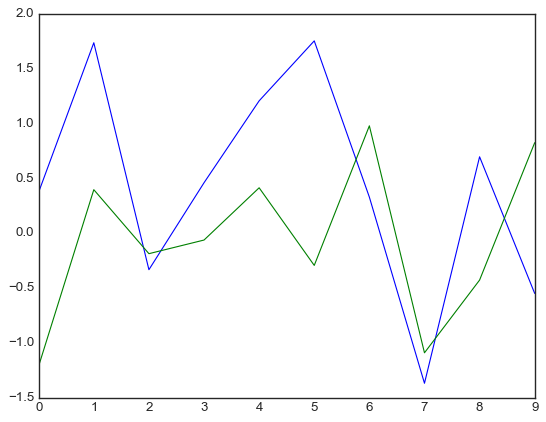

In [22]:
series2 = pd.Series(np.random.randn(10), index = np.arange(0,10,1)) # creating a sample series
series1.plot()
series2.plot()

### Talking about Plots: x-axis, y-axis, and z-axis

When we discuss plots, we use the following convention

- x-axis: horizontal axis of the plot
- y-axis: vertical axis of the plot
- z-axis: 3-dimentional "depth" of the plot. Imagine a pencil coming out of the paper (or screen) towards you.
- ticks: little markers indicating values on the axes



Customizing our plot a little. Note that <code>plt.legend()</code>,  <code>plt.title()</code>, <code>plt.ylabel()</code>, <code>plt.xlabel()</code> are customizations that apply to the figure generated on the current Notebook Cell. As we see below, this figure can contain multiple plots.

Text(0.5, 0, 'Index')

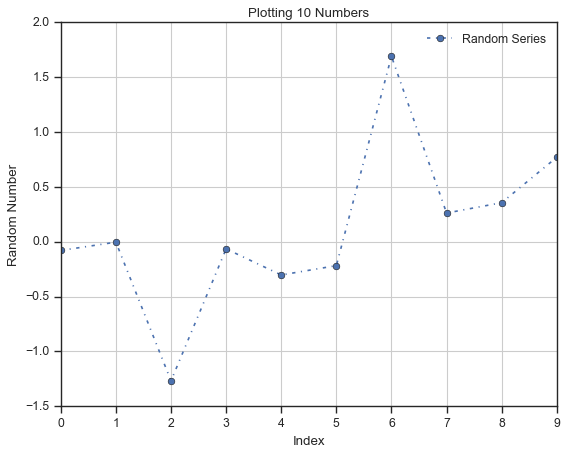

In [71]:
series1.plot(style='bo-.', label='Random Series', grid=True)

plt.legend() # command needed to add legend to plot
plt.title('Plotting 10 Numbers')
plt.ylabel('Random Number')
plt.xlabel('Index')
#plt.show() # no needed for interactive mode

### Format Strings = '[color][marker][line]'

Notice we formated our plot using <code>style='bo-.'</code>. This means: 
- <code>style='b'</code>: blue line, other options: 'g' (green), 'r'(red), etc.
- <code>style='o'</code>: circle marker, other options: '.', 'v', etc.
- <code>style='-.'</code>: line style dots and dashes, other options: '-', '--', ':'.

To plot two datasets into the same figure, simply put the two plots on the same Cell:

Text(0.5, 0, 'Index')

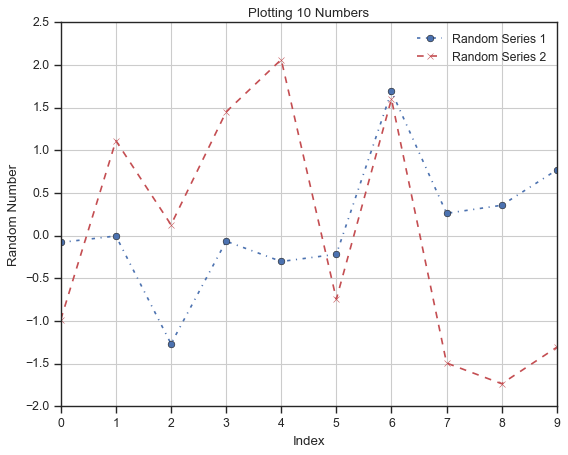

In [72]:
series2 = pd.Series(np.random.randn(10), index = np.arange(0,20,2)) # creating another sample series

series1.plot(style='bo-.', label='Random Series 1', grid=True)
series2.plot(style='rx--', label='Random Series 2', grid=True,use_index=False)
plt.legend() # command needed to add legend to plot
plt.title('Plotting 10 Numbers')
plt.ylabel('Random Number')
plt.xlabel('Index')



### Customizing Series Plots

The Series' index is passed to matplotlib for plotting on the x-axis by default, though you can disable this by passing use_index = False. The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim.

* label : Label for plot legend
* ax : matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
* style : style string, like ‘ko--’, to be passed to matplotlib
* alpha : The plot fill opacity(from 0 to 1)
* kind : Can be ‘area’, ‘bar’, ‘barh’, ‘density’, ‘hist’, ‘kde’, ‘line’, ‘pie’
* logy : Use logarithmic scaling on the y-axis
* use_index : Use the object index for tick labels
* rot : Rotation of ticks labels(0 through 360)
* xticks: Values to use for x-axis ticks
* yticks: Values to use for y-axis ticks
* xlim : X-axis limits (e.g., [0, 10])
* ylim : Y-axis limits
* grid : Display axis grid(on by default)

# Plotting DataFrames using <code>.plot()</code>

DataFrame’s <code>.plot()</code> method plots each of its columns as a different line on the same subplot, creating a legend automatically. For instance, consider the following random DataFrame:

In [74]:
dataframe1 = pd.DataFrame(np.random.randn(10, 4), columns = ['A', 'B', 'C', 'D'], index = np.arange(0, 10, 1))
dataframe1

,A,B,C,D
0,0.386604,0.107369,-0.740257,1.644034
1,-0.417700,-0.694485,0.945832,-0.937527
2,-0.531174,0.809876,-1.148045,0.417678
3,0.578274,1.238535,0.043055,0.559760
4,1.367513,-0.533344,-0.885237,1.328348
5,0.362559,-0.972670,-0.891716,-0.787324
6,0.366450,0.931123,-0.044680,1.025834
7,0.329884,0.922574,-1.049848,-0.492824
8,1.641529,-0.005534,-1.686277,0.264712
9,-0.204098,2.314202,0.887368,-0.898786


To plot <code>dataframe1</code> we just use <code>.plot()</code> as follows:

Text(0.5, 0, 'Row Index')

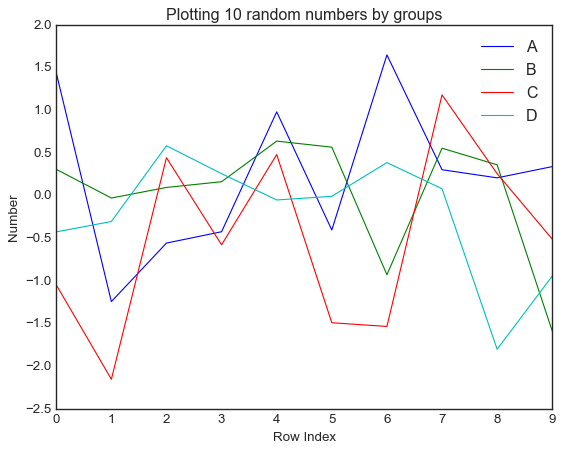

In [26]:
dataframe1.plot()
plt.title('Plotting 10 random numbers by groups')
plt.ylabel('Number')
plt.xlabel('Row Index')
#plt.show() # no need for interactive mode

### Further Customizing DataFrame Plots	

We can continue to customize this plot. Some of the most use parameters are:
* subplots : Plot each DataFrame column in a separate subplot
* sharex : if subplots = True, share the same x-axis, linking ticks and limits
* sharey : if subplots = True, share the same y-axis.
* figsize : Size of figure to create as tuple
* title : Plot title as string
* legend : Add a subplot legend(True by default)
* sort_columns : Plot columns in alphabetical order, by default uses existing column order.

# Bar Plots using <code>plot.bar()</code> and <code>plot.barh()</code>

The <code>plot.bar()</code> and <code>plot.barh()</code> make vertical and horizontal bar plots, respectively. In this case, the Series and DataFrame index will be used as the x(bar) or y(barh) ticks. 




### Series

In [27]:
Series2 = pd.Series(np.random.rand(16), index = list ('abcdefghijklmnop'))
Series2

a    0.142053
b    0.299590
c    0.358063
d    0.231751
e    0.539114
f    0.656716
g    0.575183
h    0.368617
i    0.149521
j    0.466011
k    0.582260
l    0.399116
m    0.901102
n    0.166319
o    0.738060
p    0.651543
dtype: float64

<AxesSubplot:>

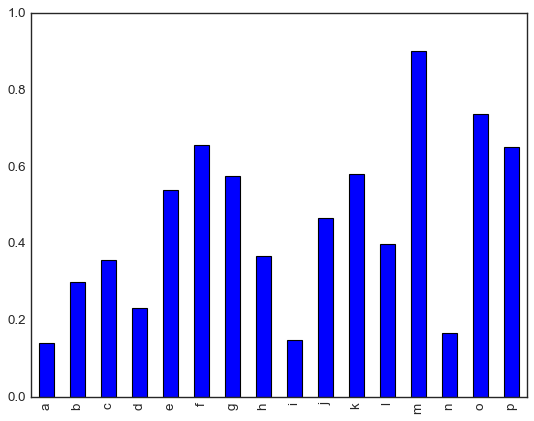

In [28]:
Series2.plot.bar()

<AxesSubplot:>

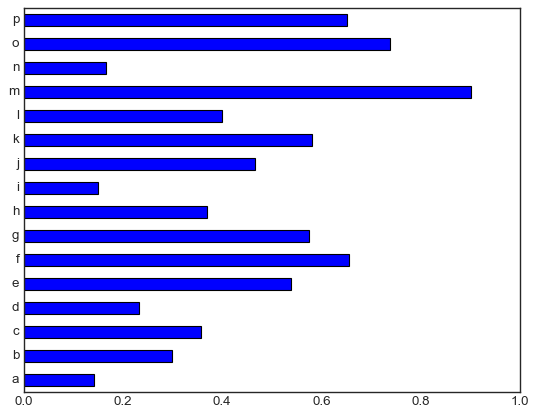

In [29]:
Series2.plot.barh()

### DataFrame

Consider the following Dataframe:

In [30]:
df = pd.DataFrame(np.random.rand(6,4), index = ['one', 'two', 'three', 'four', 'five', 'six'], columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df

Genus,A,B,C,D
one,0.905780,0.881889,0.122672,0.135656
two,0.601184,0.882799,0.125124,0.735315
three,0.005212,0.387096,0.381383,0.152816
four,0.169760,0.674097,0.070795,0.947462
five,0.695375,0.389987,0.408084,0.523210
six,0.505332,0.778532,0.775049,0.239211


By default, <code>.plot.bar</code> will take the row index as the plot "x axis" and the columns as the plot "y axis", since there are multiple columns, the columns are grouped.

<AxesSubplot:>

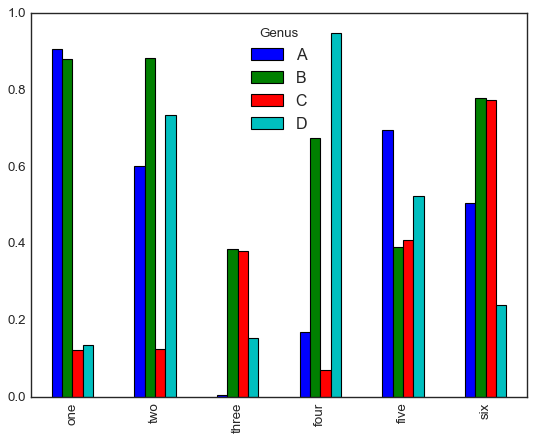

In [31]:
df.plot.bar() # Plots rows as x axis (as usual) and group columns

We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together.

<AxesSubplot:>

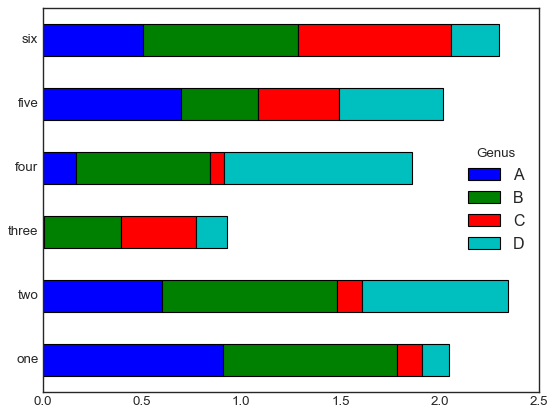

In [32]:
df.plot.barh(stacked = True) # Stacks each row

# Multiple Plots 

It is possible to plot multiple plots into a single figure. For this we use <code>.subplots</code> and provide two numbers: number of rows and number of columns on the plot grid. For instance <code>.subplots(2,2)</code> create a figure with a grid of 4 subplots (2 rows and 2 columns). <code>.subplots</code> returns the <code>axes</code> of the subplots. We use <code>ax=</code> while ploting a DataFrame to indicate on which subplot space the current plot should go. For example:

<AxesSubplot:>

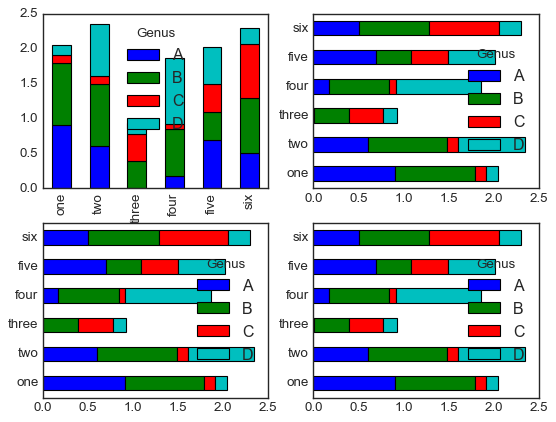

In [33]:
fig, axes1 = plt.subplots(2,2) # 4 subplots defined
df.plot.bar(ax = axes1[0,0], stacked = True) # top, left is .bar()
df.plot.barh(ax = axes1[0,1], stacked = True) # others are .barh()
df.plot.barh(ax = axes1[1,0], stacked = True)
df.plot.barh(ax = axes1[1,1], stacked = True)

# Plot Styles

In [34]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:>

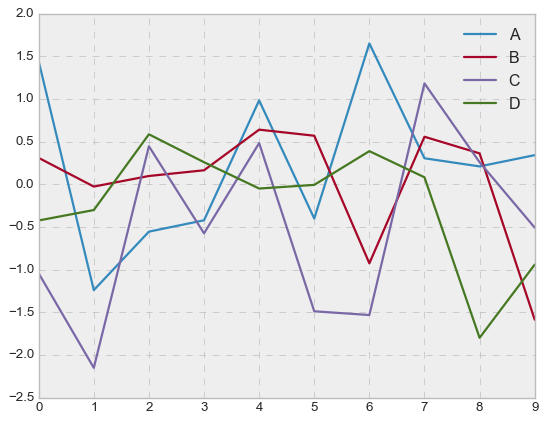

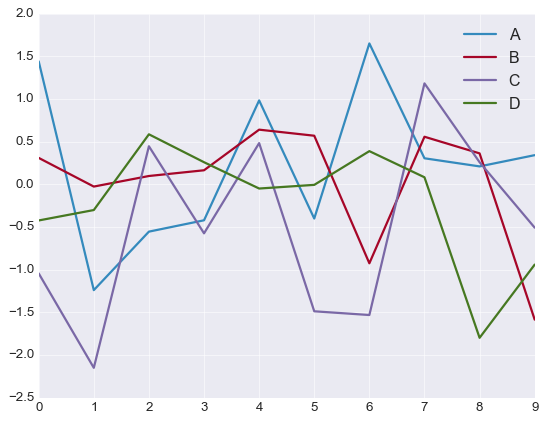

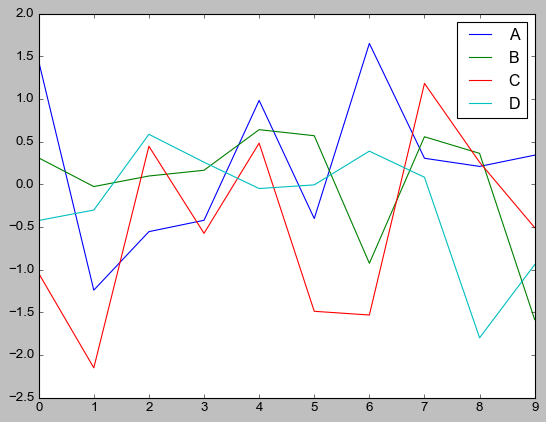

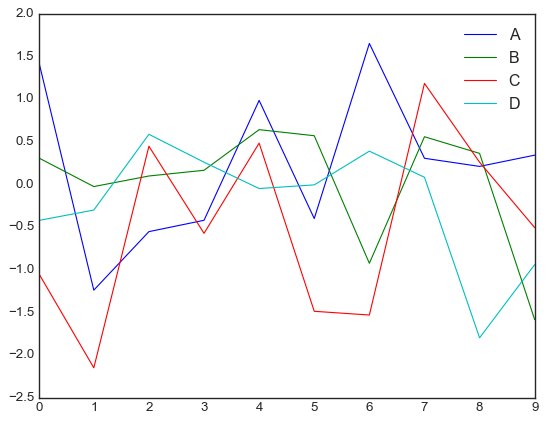

In [35]:
plt.style.use('bmh') #one of many styles.                               
dataframe1.plot()                                
 
plt.style.use('seaborn-darkgrid') #one of many styles.                               
dataframe1.plot()

plt.style.use('classic') #one of many styles.                               
dataframe1.plot()         
    
plt.style.use('seaborn-white') #one of many styles.                               
dataframe1.plot()     


# Histogram Plots using <code>.plot.hist()</code>

A histogram is a kind of a bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. For example, see the default histogram plot for 10,000 random number generated using <code>np.random.randn()</code>


(array([  22.,  126.,  553., 1487., 2569., 2613., 1720.,  693.,  195.,
          22.]),
 array([-3.62707593, -2.9192165 , -2.21135707, -1.50349765, -0.79563822,
        -0.08777879,  0.62008063,  1.32794006,  2.03579949,  2.74365891,
         3.45151834]),
 <BarContainer object of 10 artists>)

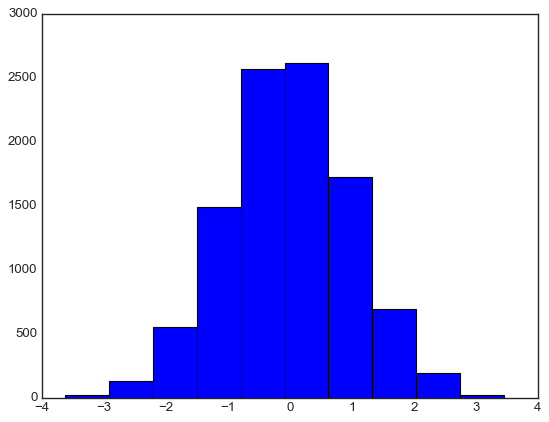

In [36]:
data = np.random.randn(10000)
plt.hist(data)

<code>.plot.hist()</code> has many options to tune both the calculation and the display; here is an example of a custom histogram. The main difference is that we have defined 100 bins. <Code>cumulative=True</code> compute histogram by the counts on a bin plus counts on all smaller bins.

(array([  2.,   0.,   1.,   5.,   3.,   1.,   2.,   1.,   3.,   4.,   6.,
          5.,   4.,  10.,   9.,  16.,  13.,  25.,  15.,  23.,  34.,  41.,
         33.,  48.,  51.,  58.,  69.,  64.,  78.,  77.,  95., 114., 113.,
        125., 149., 159., 158., 178., 184., 212., 221., 225., 235., 275.,
        283., 255., 264., 244., 287., 280., 280., 302., 284., 264., 276.,
        275., 246., 236., 246., 204., 221., 236., 195., 179., 141., 188.,
        158., 143., 149., 110., 105.,  99.,  85.,  76.,  84.,  50.,  64.,
         43.,  48.,  39.,  53.,  32.,  19.,  19.,  19.,  17.,  15.,  11.,
          4.,   6.,   3.,   4.,   3.,   5.,   1.,   0.,   1.,   3.,   1.,
          1.]),
 array([-3.62707593, -3.55628998, -3.48550404, -3.4147181 , -3.34393216,
        -3.27314621, -3.20236027, -3.13157433, -3.06078839, -2.99000244,
        -2.9192165 , -2.84843056, -2.77764461, -2.70685867, -2.63607273,
        -2.56528679, -2.49450084, -2.4237149 , -2.35292896, -2.28214302,
        -2.21135707, -2.14

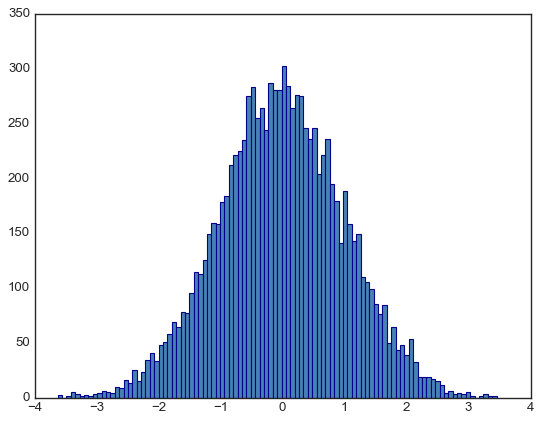

In [37]:
plt.hist(data, bins = 100, cumulative=False, color = 'steelblue', edgecolor = 'darkblue')

Histogram can be 1D, 2D, and 3D. Histogram creates a tessellation of squares across the axes. Another natural shape for such a tessellation is the regular hexagon. For this purpose, Matplotlib provides the <code>.plot.hexbin()</code> routine, which represents a 2D dataset binned within a grid of hexagons.

,x,y
0,-0.704658,-0.015687
1,0.358605,0.269071
2,1.223749,0.399313
3,0.138688,0.619480
4,1.541058,0.642915
...,...,...
9995,-0.122772,-0.512029
9996,-3.142275,0.169979
9997,0.870347,-0.435723
9998,-1.968270,-0.138752


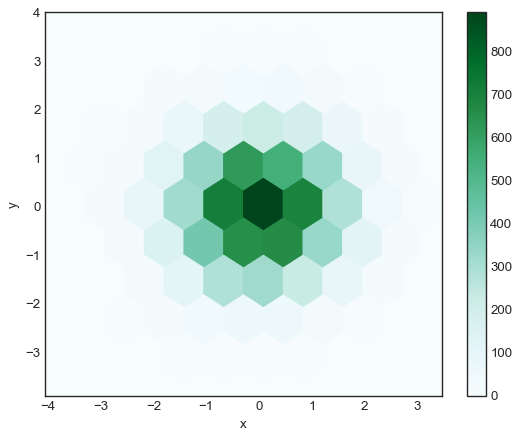

In [38]:
n = 10000
df = pd.DataFrame({'x': np.random.randn(n),
                  'y': np.random.randn(n)})
df.plot.hexbin(x='x', y='y', gridsize=10)
df

# Density Plots using <code>seaborn.distplot</code> 

A density plot is formed by computing an estimate of a continuous probability distribution that fits the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels” --that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using <code>plot.kde</code> makes a density plot using the conventional mixture-of-normals estimate. The method used here is <code>plot.density()</code> which generates a Kernel Density Estimate plot using Gaussian kernels.

 As an example, let us consider a bimodal distribution consisting of draws from two different standard normal distributions centered at 0 and 10, and with standard deviations of 1 and 3 respectively. We draw 500 samples of each and combine them into a Series using <code>np.concatenate()</code>:


<AxesSubplot:>

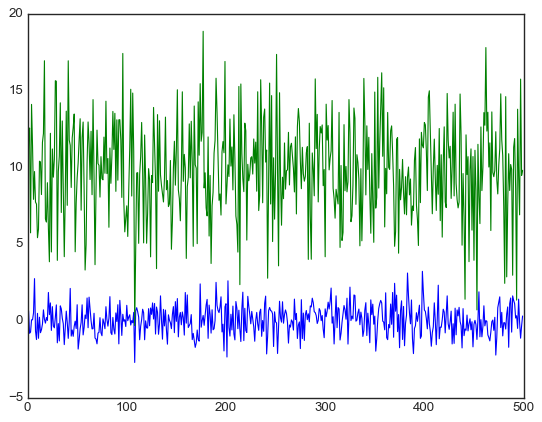

In [39]:
comp1 = np.random.normal(0, 1, size = 500) #0=distribution center
                                            #1=standar deviation (spread)
                                            #size= number of samples returned
                                            #Output: "size" samples drawn from normal distribution
pd.Series(comp1).plot()
comp2 = np.random.normal(10, 3, size = 500) # second distribution
pd.Series(comp2).plot()

<AxesSubplot:>

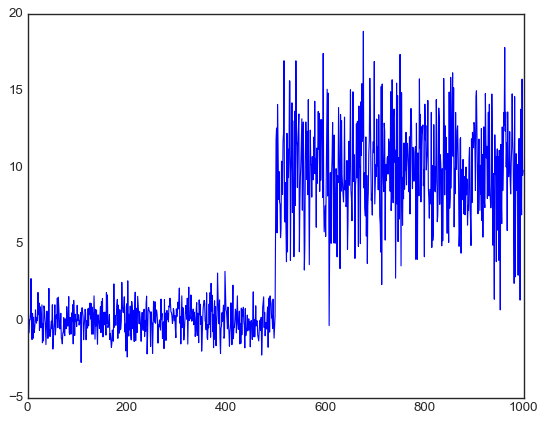

In [40]:
values = pd.Series(np.concatenate([comp1, comp2])) #concatenate both dist.
values.plot()

<AxesSubplot:ylabel='Density'>

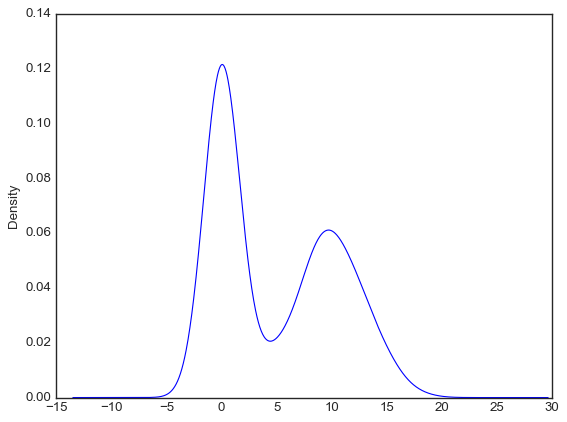

In [41]:
values.plot.density()

Seaborn makes histogram and density plots even easier through its <code>seaborn.distplot()</code> method, which combines mathplotlib <code>hist()</code> function with seaborn continuous density estimate <code>kdeplot()</code> and plot them simultaneously.

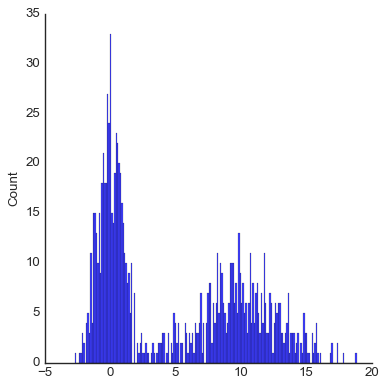

In [42]:
sns.displot(values, bins = 200)

# Contour Plots 
Sometimes it is useful to display 3D data on 2D using contours or color-coded regions representing constant z slices. There are three Matplotlib functions that can be helpful for this task: <code>plt.contour()</code> for contour plots, <code>plt.contourf()</code>  for filled contour plots and <code>plt.imshow</code> for showing images. We will start by demonstrating a contour plot using function $z=f(x,y)$, where:

$$ f(x,y)=\sin(x)^{10} + \cos(10+yx) \cos(x)$$


In [43]:
def f(x, y): 
    return np.sin(x) ** 10 + np.cos(10+y*x) * np.cos(x)

We create a contour plot using <code>plt.contour()</code>, but first we use <code>np.meshgrid</code> to build a 2D grid from two 1D arrays.

Vectors:  x= [0 1 2 3] y= [0 1 2]
Mesh (x,y):
 X=
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]] 
Y=
 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]
f(X,Y)=Z=
 [[-0.83907153 -0.27536398  0.73559698  0.83067452]
 [-0.83907153  0.18037951  0.03525287 -0.8983655 ]
 [-0.83907153  0.63392454  0.32951726  0.9480757 ]]


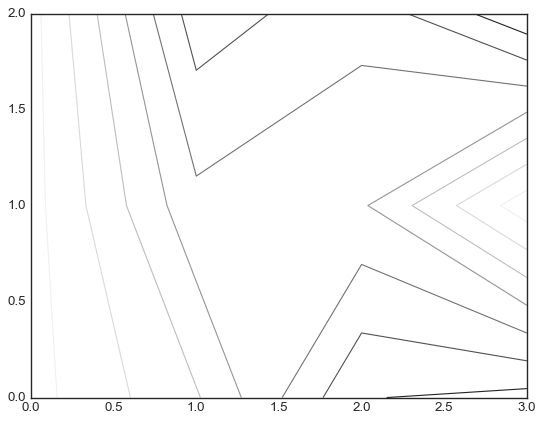

In [44]:
x=np.arange(0,4,1)          #start, stop, step
y=np.arange(0,3,1)
X, Y = np.meshgrid(x, y)    #create a mesh
Z = f(X, Y)                 # calculate Z for (x,y) mesh values

plt.contour(Z)

# Observing raw data:
print('Vectors: ','x=',x, 'y=',y)
print("Mesh (x,y):\n","X=\n",X, "\nY=\n",Y)
print ("f(X,Y)=Z=\n",Z)

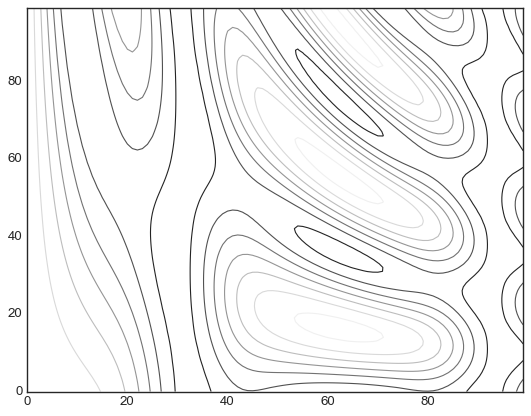

In [45]:
x = np.linspace(0, 5, 100)  #start, stop, samples: number of equaly-spaced-samples in between 
y = np.linspace(0, 5, 100) 
#print(x)

X, Y = np.meshgrid(x, y) #numpy.meshgrid() is used to return coordinate matrices from coordinate vectors. 
#print(X)
#print(Y)
Z = f(X, Y)

plt.contour(Z)

We can continue to customize our contour plot. For instance we want 30 countours (levels)<code>30</code>, a particular color map <code>cmap = 'RdGy'</code>, contours filled using <code>plt.contourf()</code>, and we want to show the <code>plt.colorbar()</code>, which automatically creates an additional axis with labeled color information for the plot. <br>
**Note:** Additional color maps include: <code>RdGy, coolwarm, Spectral, BrBG, etc.</code>. For a full list see references at the end of this Notebook.

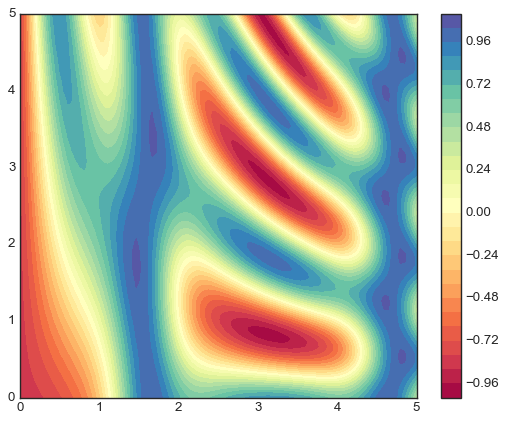

In [46]:
plt.contourf(X, Y, Z, 30, cmap = 'Spectral')
plt.colorbar();

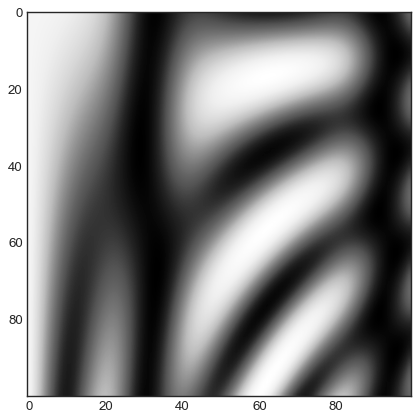

In [47]:
plt.imshow(Z)

<code>plt.imshow()</code> diplay image. By default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. We fix this by using <code>origin = 'lower'</code>. The "extent" of the image is determined automatically. In our case we want <code>extent = [0,5,0,5]</code> to match our contour plot.

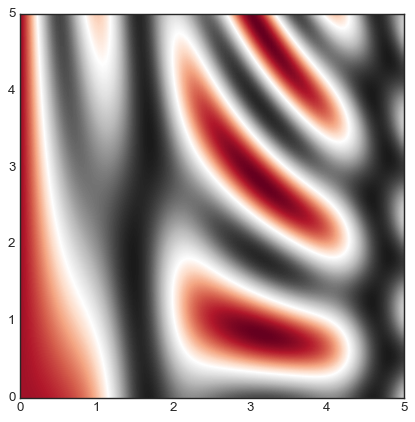

In [48]:
plt.imshow(Z, extent = [0,5,0,5], cmap = 'RdGy',  origin = 'lower')

# Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. Lets use macroeconomic data since 1959 to 2009.
For example, 

In [49]:
sns.set(style="ticks", color_codes=True)

In [50]:
macro = pd.read_csv('../Data/macrodata.csv')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


Lets select few values from data:
- __cpi__: End of the quarter consumer price index for all urban consumers: all items (seasonally adjusted), changes in price level or market basket of consumer
- __m1__: End of the quarter M1 nominal money stock (seasonally adjusted), money supply
- __tbilrate__: Quarterly monthly average of the monthly 3-month treasury bill: secondary market rate
- __unemp__: Seasonally adjusted unemployment rate (%)

In [51]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.tail()

,cpi,m1,tbilrate,unemp
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2
202,216.385,1673.9,0.12,9.6


We transform the data to highlight diferences between consecutive quarters in order to improve our analysis.
<br>
To do this, we first calculate the logarithms of the data using <code>.log()</code> and second we calculate the difference between an element of the dataframe and the element in the same column of the previous row using <code>.diff()</code>. 

In [52]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


We can now use seaborn’s regplot method, which makes a scatter plot and fits a linear regression line. To test, we find the correlation between 'unemp' and 'unemp'. It should be a perfect diagonal line.



Text(0.5, 1.0, 'Changes in log unemp versus log unemp')

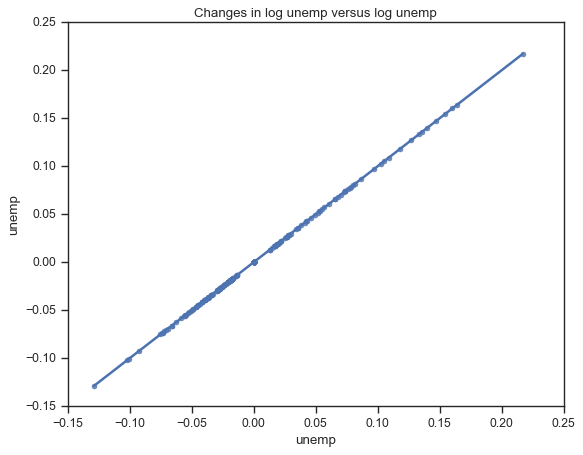

In [53]:
sns.regplot(x='unemp', y='unemp', data = trans_data)
plt.title('Changes in log %s versus log %s' %('unemp', 'unemp'))

Now lets find the correlations between all other variables:

Text(0.5, 0.98, 'Determining Correlations in Macroeconomic Data')

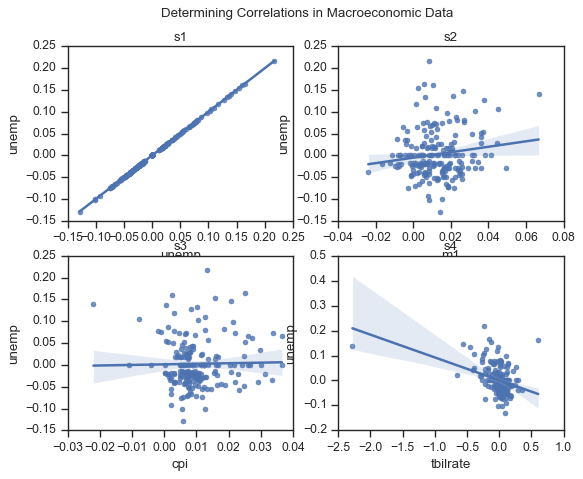

In [54]:
fig, axes1 = plt.subplots(2,2) # 4 subplots defined

sns.regplot(x='unemp', y='unemp', data = trans_data, ax=axes1[0,0])
sns.regplot(x='m1', y='unemp', data = trans_data, ax=axes1[0,1])
sns.regplot(x='cpi', y='unemp', data = trans_data, ax=axes1[1,0])
sns.regplot(x='tbilrate', y='unemp', data = trans_data, ax=axes1[1,1])

#axes1[0,0].set_title('log %s vs. log %s' %('unemp', 'unemp'))
axes1[0,0].set_title('s1')
axes1[0,0].set_xlabel('unemp')
axes1[0,0].set_ylabel('unemp')

axes1[0,1].set_title('s2')
axes1[0,1].set_xlabel('m1')
axes1[0,1].set_ylabel('unemp')

axes1[1,0].set_title('s3')
axes1[1,0].set_xlabel('cpi')
axes1[1,0].set_ylabel('unemp')

axes1[1,1].set_title('s4')
axes1[1,1].set_xlabel('tbilrate')
axes1[1,1].set_ylabel('unemp')

fig.suptitle('Determining Correlations in Macroeconomic Data')

## <code> seaborn.pairplot()</code>

In exploratory data analysis, it is helpful to be able to look at all the scatter plots among a group of variables, this is known as pairs plot or scatter plot matrix. Making such a plot from scratch is a bit of work, there are inbuilt libraries like seaborn, has convenient pair plot function, which supports placing histograms or density estimates of each variable along the diagonal: <code>seaborn.pairplot()</code>. For these pair plots, there is also <code>plots_kws</code> argument that enables to pass down configuration options to the individual plotting calls on the off-diagonal elements. More granular configuration options are available on seaborn.pairplot docstring. 

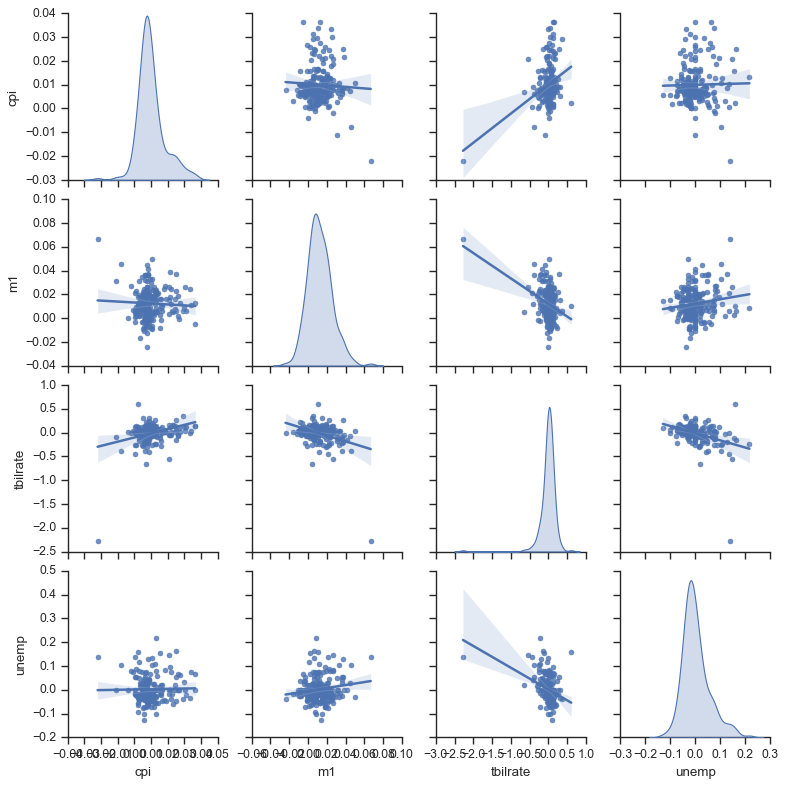

In [55]:
sns.pairplot(trans_data, diag_kind="kde", kind="reg")

## Iris Dataset

Attribute Information:
   - sepal length in cm
   - sepal width in cm
   - petal length in cm
   - petal width in cm
   - class: 
             - Iris Setosa
             - Iris Versicolour
             - Iris Virginica

Number of Instances: 150 

In [56]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


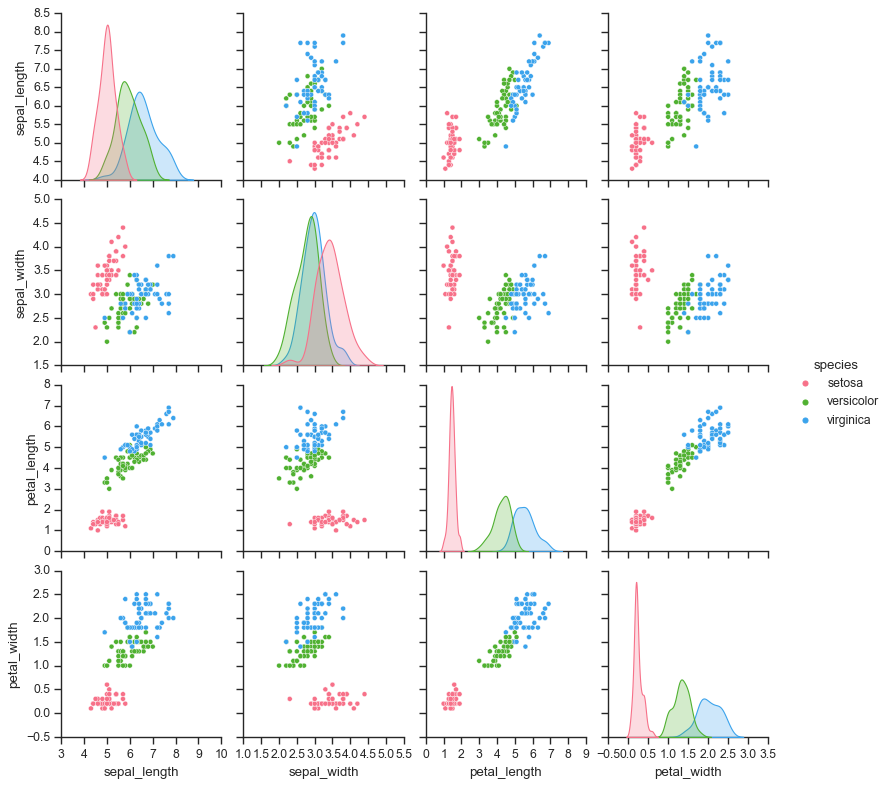

In [57]:
sns.pairplot(iris, hue="species", palette="husl")

# Facets and Categorical Data

One way to visualize data with many categorical variables is to use a facet grid. Seaborn has a useful built-in function ```sns.catplot()``` that simplifies making many kinds of faceted plots.


In [58]:
tips = pd.read_csv('../Data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


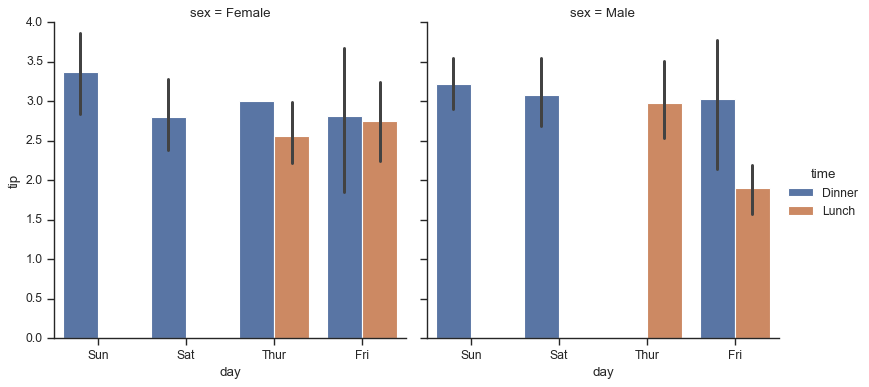

In [59]:
sns.catplot(x= 'day', y= 'tip', hue = 'time', col = 'sex', kind = 'bar', data = tips)
plt.show()

Instead of grouping by ‘time’ by different bar colors within a facet, we can also expand the facet grid by adding one row per time value. 

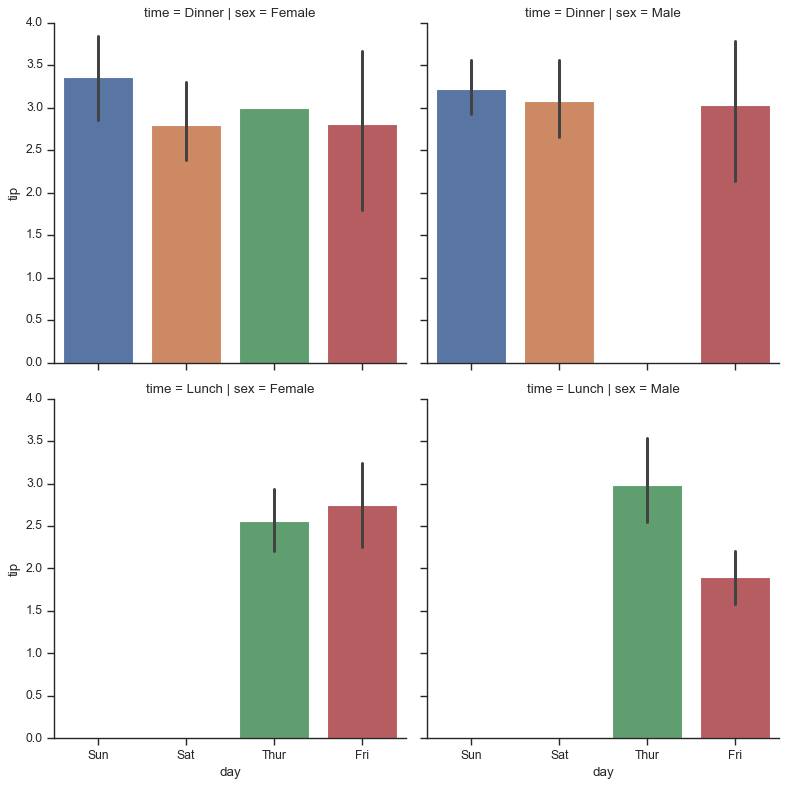

In [60]:
sns.catplot( x= 'day', y = 'tip', row = 'time', col = 'sex', kind = 'bar', data = tips)
plt.show()

### Box Plots
Factorplot supports other plot types that may be useful depending on what we are trying to display. For example, box plots (which show the minimum, first quartile, median, third quartile, maximum, and outliers) can be effective visualization type.

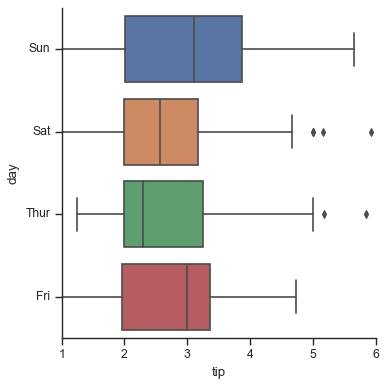

In [61]:
sns.catplot(x='tip', y='day', kind='box', data = tips[tips.tip < 6])

# 3D Plots
3D surface colored with the coolwarm colormap.



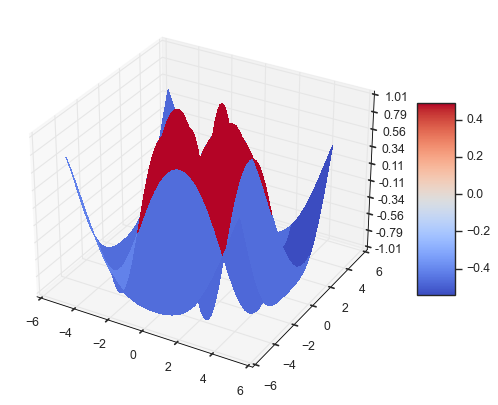

In [62]:
from matplotlib import cm # import color map
from matplotlib.ticker import LinearLocator 


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis: limits and ticks
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Visualization of Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.

A basic errorbar can be created with single Matplotlib function call:


<ErrorbarContainer object of 3 artists>

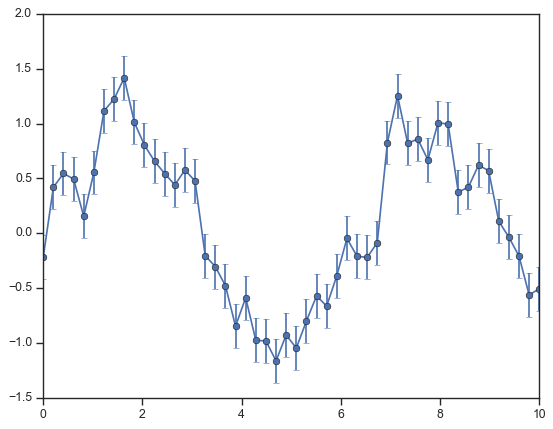

In [63]:
x= np.linspace(0,10,50) #50 measures from 0 to 10
dy = 0.2                #delta y, noise added here
y = np.sin(x) + dy *np.random.randn(50) #vector= sin(x)+ (dy)*random

#y_signal = pd.Series(np.sin(x))
#y_signal_with_noise = pd.Series(np.sin(x)+ dy *np.random.randn(50))
#y_signal.plot()
#y_signal_with_noise.plot()

plt.errorbar(x, y, yerr=dy, fmt = 'bo-')

Here the fmt is a format code controlling the appearance of lines and points. In addition to these basic options, the errorbar function has many options to fine tune the outputs. Using these additional options we can easily customize the aesthetics of error plot, especially when the data is too crowded.

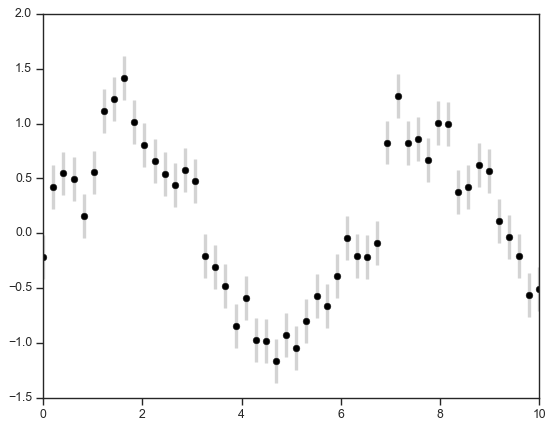

In [64]:
plt.errorbar(x, y, yerr = dy, fmt ='o', color = 'black', ecolor = 'lightgray', elinewidth = 3, capsize = 0);

# References
1. PyPlot, arguments, parameters, format strings, https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
2. Seaborn.distplot, https://seaborn.pydata.org/generated/seaborn.distplot.html
3. Pandas plotting, http://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html#targeting-different-subplots
4. Mathplotlib tutorials, https://matplotlib.org/tutorials/index.html
5. Multivariate kernel density estimation, https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation
6. seaborn.distplot, https://seaborn.pydata.org/generated/seaborn.distplot.html
7. Coutour plot, https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html
8. Color maps, https://matplotlib.org/examples/color/colormaps_reference.html?highlight=cmap
9. USA macroeconomic data, https://www.statsmodels.org/dev/datasets/generated/macrodata.html
10. seaborn.regplot(), https://seaborn.pydata.org/generated/seaborn.regplot.html

_Last updated on 10.1.2024 8:43am<br>
(C) 2024 Complex Adaptive Systems Laboratory all rights reserved._